# Implementacion de GP en Spence y comparacion con OK mediante f1

## Recuerdos:
<br>
<br>
### Definicion de un GP:
Un Proceso Gausiano queda definido de la siguiente forma:
<br>
<br>
 <div style="text-align:center"><span>_Un GP es una colección de variables aleatorias, tales que cada vez que se considera un conjunto finito de ellas, tienen ley conjunta gausiana_</span>.</div>
<br>
<br>
Lo anterior es equivalente a lo siguiente: Sean $\{x_1, \ldots, x_k\} \subseteq \mathbb{R}^3$, entonces la densidad conjunta de $\mathbf{f} = (f(x_1), \ldots, f(x_k))$ está dada por:
<br>
<br> 
$$
\mathbb{P}(\mathbf{f})  = \dfrac{1}{\sqrt{(2 \pi)^k |\Sigma|}} \exp \left(-\dfrac{1}{2} (\mathbf{f}-\mathbf{\mu})^\top \Sigma^{-1} (\mathbf{f} - \mathbf{\mu}) \right)
$$
<br>
<br>
donde $\mathbf{\mu} \in \mathbb{R}^k, \Sigma \in \mathcal{M}_k(\mathbb{R})$ están dados por $\mathbf{\mu} = (m(x_1), \ldots, m(x_k))$ y $\Sigma_{i,j} = k(x_i, x_j)=k(X,X)_{i,j}$, con $X$ la matriz que tiene por filas a los vectores $\{x_1, \ldots, x_k\}$, y $m(\cdot)$, $k(\cdot, \cdot)$ la función de media y covarianza (o también llamado kernel), respectivamente.
<br>
<br>

# ¿Cómo funciona el GP en la práctica?

Consideremos un conjunto de entrenamiento $X,y$, y un punto $x_{*}$ donde:
* $X$ es una matriz que tiene como filas puntos del espacio (e.g. del yacimiento). Estos son los puntos donde se conoce la ley.
* $y$ es un vector columna que tiene las leyes de algún mineral de interés.
* $x_*$ es otro punto del espacio donde se quiere **_estimar_** la ley.
<br>
<br>
Digamos que los puntos que conforman la matriz $X$ son $x_1, \ldots, x_k$, y que los valores de la ley son $y_i = f(x_i) $ con $i \in \{1, \ldots, k \}$. Sea por útlimo $f_*$ el valor de la ley en $x_*$. Como $f(x_1), \ldots,f(x_k),  f(x_*)$ tinen ley conjunta gausiana dada por una función de media nula $m =0$ y una función de covarianza $k$, entonces
<br>
<br>
\begin{equation}
\begin{bmatrix}\mathbf{f} \\ f_* \end{bmatrix} \sim \mathcal{N}\left(\vec{0}, \begin{bmatrix} k(X,X) & k(X,x_*)\\k(x_*, X) & k(x_*,x_*) \end{bmatrix} \right)
\end{equation}
<br>
<br>
Así, lo que nos interesa es, apartir de la ecuacion de arriba, encontrar una ley para $f_*$ que considere la data observada $X, y$. Dada la ecuación de arriba, notamos que si *__
condicionamos en las observaciones__*, obtenemos una ley para $f(x_*)$:
$$
f_*\lvert x_*, X, y \sim \mathcal{N}(k(x_*,X)k(X,X)^{-1}\mathbf{y}, k(x_*,x_*)-k(x_*,X)k(X,X)^{-1} k(X, x_*))
$$
<br>
<br>


# ¿Cómo se selecciona el modelo?

El modelo GP principalmente queda determinado por su función de covarianza (o kernel). Ejemplos de kernels son:
* RBF:
$$
k(x,x') = \sigma^2 \exp \left[- \dfrac{\|x-x'\|^2}{2 \ell^2}\right]
$$
* Matern32:
$$
k(x,x') = \sigma^2\left( 1+ \dfrac{\sqrt{3\|x-x'\|^2}}{\ell} \right) \exp \left[ -\dfrac{\sqrt{3\|x-x'\|^2}}{\ell}\right]
$$
* Matern52:
$$
k(x,x') = \sigma^2 \left( 1 + \dfrac{\sqrt{5\|x-x'\|^2}}{\ell} + \dfrac{5\|x-x'\|^2}{3 \ell^2}\right) \exp \left[ -\dfrac{\sqrt{5\|x-x'\|^2}}{\ell} \right] 
$$

# Cómo influye la eleccion del kernel...

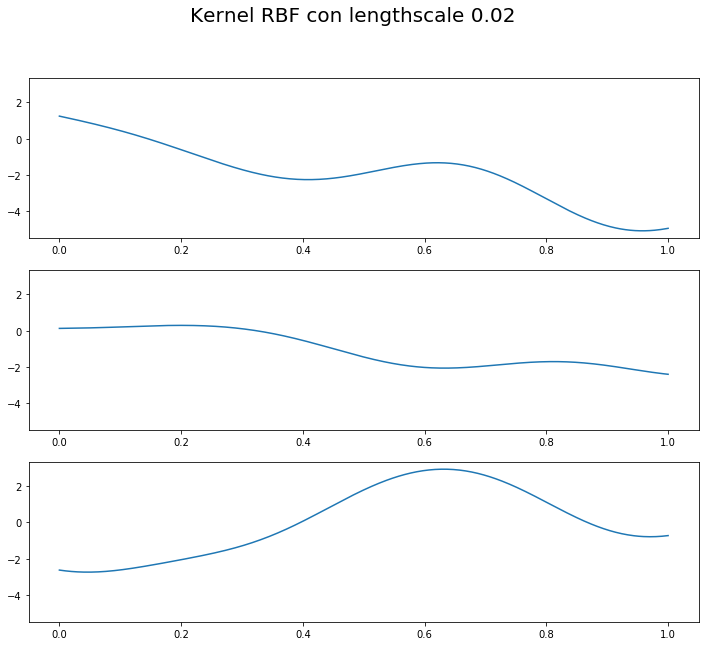

In [3]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

k = GPy.kern.RBF(input_dim=1, lengthscale=0.2, variance=2)
X = np.linspace(0.,1.,500)

# 500 points evenly spaced over [0,1]
X = X[:,None]
# reshape X to make it n*D
mu = np.zeros((500))
# vector of the means
C = k.K(X,X)
# covariance matrix
# Generate 20 sample path with mean mu and covariance C
Z = np.random.multivariate_normal(mu,C,20)

fig, axes = plt.subplots(nrows=3, ncols=1, sharey=True)
fig.set_size_inches(12,10)

for i,ax in enumerate(axes):
    eje_i = axes[i,]
    eje_i.plot(X[:], Z[i,])
    # eje_i.set_title('Kernel RBF con lengthscale {}'.format(0.02), size=20)
plt.suptitle('Kernel RBF con lengthscale {}'.format(0.02), fontsize=20)
plt.show()

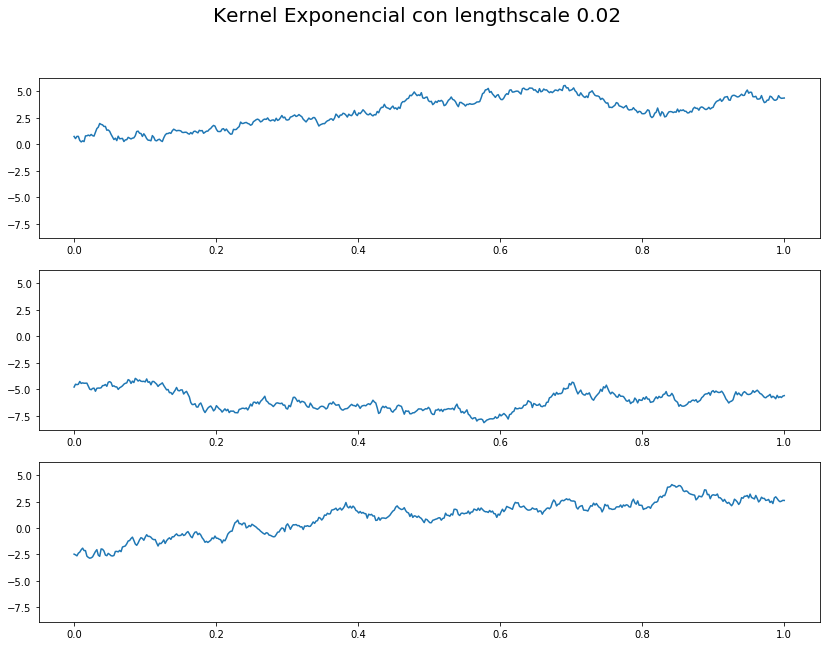

In [5]:
k = GPy.kern.Exponential(input_dim=1, lengthscale=1, variance=9)
X = np.linspace(0.,1.,500)

# 500 points evenly spaced over [0,1]
X = X[:,None]
# reshape X to make it n*D
mu = np.zeros((500))
# vector of the means
C = k.K(X,X)
# covariance matrix
# Generate 20 sample path with mean mu and covariance C
Z = np.random.multivariate_normal(mu,C,20)

fig, axes = plt.subplots(nrows=3, ncols=1, sharey=True)
fig.set_size_inches(14,10)
for i,ax in enumerate(axes):
    eje_i = axes[i,]
    eje_i.plot(X[:], Z[i,])
    # eje_i.set_title('Kernel Expoential con lengthscale {}'.format(0.02), size=20)
plt.suptitle('Kernel Exponencial con lengthscale {}'.format(0.02), fontsize=20)
plt.show()

# Selección de los parámetros del modelo

 Dada una matriz de covarianza $K_{i,j}=k(x_i,x_j)$, y suponiendo una funcion de media $m =0$, la _verosimilitud marginal_ viene  dada por:
<br>
<br>
$$
\mathbb{P}(\mathbf{f}) = \dfrac{1}{\sqrt{(2 \pi)^n |K|}} \exp\left(-\dfrac{1}{2} \mathbf{f}^\top K^{-1} \mathbf{f}\right)
$$
<br>
<br>
Como se observó antes, es necesario escoger los parámetros (los cuales denotamos y agrupamos en un vetor $\theta$) del modelo (por ejemplo el lengthscale que define a los kernels). Para ello se consideran el _estimador de máxima verosimilitud_, es decir, se escoge $\theta$ el cual resuelve el siguiente problema de optimización:

$$
\max_{\theta} \mathbb{P}(\mathbf{f}) \Longleftrightarrow \max_{\theta} \log(\mathbb{P}(\mathbf{f}) \Longleftrightarrow \max_{\theta} -\dfrac{n}{2} \log(2\pi) -\dfrac{1}{2}\log|K|-\dfrac{1}{2}\mathbf{f}^\top K^{-1} \mathbf{f}
$$
<br>
<br>
<br>
<br>
En la práctica, lo que uno resuleve es:
$$
\min_{\theta} \dfrac{n}{2} \log(2\pi) +\dfrac{1}{2}\log|K|+\dfrac{1}{2}\mathbf{f}^\top K^{-1} \mathbf{f}
$$

# Ejemplo relevancia del kernel: Mauna Loa CO2 data

In [3]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata

data = fetch_mldata('mauna-loa-atmospheric-co2').data
X = data[:, [1]]
y = data[:, 0]

# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2  + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Kernel with optimized parameters
k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, np.inf))  # noise terms
kernel = k1 + WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-3, np.inf)) # + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(X, y)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

Automatically created module for IPython interactive environment
GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -87.034

Learned kernel: 29.5**2 * RBF(length_scale=36.8) + WhiteKernel(noise_level=4.44)
Log-marginal-likelihood: -1027.119


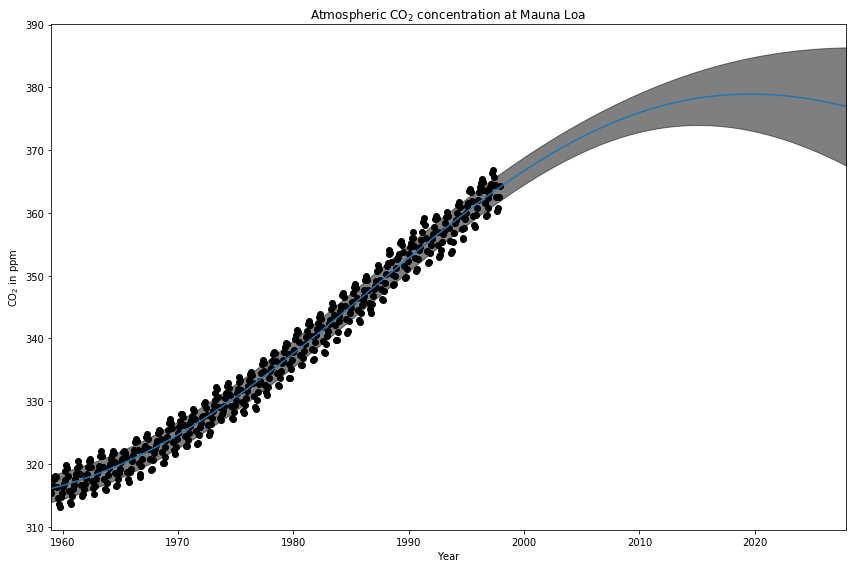

In [4]:
# Illustration
plt.figure(figsize=(12,8))
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

# Comparación de f1
<br>
<br>
## Entrenamiento y estimación:
<br>
<br>
Para el entrenamiento y estimación del modelo se hizo lo siguiente:
1. Se selecciona un $\texttt{holeid}$
2. Por cada pozo en $\texttt{holeid}$, se realiza una busqueda de muestras para realizar la estimación.
<br>
<br>

Para toda la estimación se utiliza el mismo kernel, en este caso el RBF. Para ver el grafico correr $\texttt{visualizacion_estimacion.py}$. 


# Pasos a seguir

A pesar de que los resultados hayan mejorado según el f1, hay por lo menos dos aspectos a invastigar que podrían sacar más partido del GP:
<br>
<br>
* <span style="color:blue"> Investigación del (los) kernel(s) </span>: En el ejemplo anterior se aprecia la importancia del kernel al momento de capturar propiedades de la señal. Si bien el kernel utilizado en el ejercicio del f1 es uno muy general y flexible, una formulación más detallada se hace necesaria para capturar la potencia del GP. [Para informacion en una busqueda automática, ver este hermoso paper][kernelSearch].
<br>
<br>
<br>
<br>
* <span style="color:blue">Un GP que mire todos los datos</span>: En el presente ejercicio se hizo un entrenamiento punto por punto del proceso Gaussiano. La inferencia exacta del GP es de orden (para $n$ datos) $\mathcal{O}(n^3)$, y una demanda de espacio de orden $\mathcal{O}(n^2)$.[Más información a este respecto aquí][GPBigData] o [aquí][streamGP].

[GPBigData]:https://arxiv.org/ftp/arxiv/papers/1309/1309.6835.pdf
[kernelSearch]:https://arxiv.org/pdf/1302.4922.pdf
[streamGP]:https://arxiv.org/abs/1705.07131